In [88]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import datetime
import re

from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import folium
from folium import plugins
import json
import geopandas as gpd
from geopandas import gpd
from haversine import haversine
from shapely.geometry import Point, shape, mapping,Polygon
from shapely.ops import unary_union
import folium
from folium import plugins

In [2]:
directory = '/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/'
location = pd.read_csv(directory + 'data/sdot_censor_location.csv')
# censor2 = censor[censor.시리얼.isin(location.사이트명.unique())]

In [3]:
sensor = gpd.read_file('/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/data/censor.shp')

In [4]:
seoul = gpd.read_file('/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/data/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp')

In [5]:
sensor_g = sensor[['serial','geometry']].drop_duplicates()

In [6]:
sensor.head()

,serial,date,fp,gu,juso,lat,lon,subway,bus,building_c,building_a,pop,geometry
0,"2,992.0000",2021-01-04,"6,594.7167",???,????? ??? ??? 733-28,37.4895,126.8848,"15,223.5000","1,248.3000",22,"11,335.4700","4,508.0000",POINT (37.489 126.885)
1,"2,992.0000",2021-01-05,"6,290.3333",???,????? ??? ??? 733-28,37.4895,126.8848,"14,932.0000","1,239.3000",22,"11,335.4700","4,508.0000",POINT (37.489 126.885)
2,"2,992.0000",2021-01-06,"6,222.3667",???,????? ??? ??? 733-28,37.4895,126.8848,"15,729.0000","1,254.0000",22,"11,335.4700","4,508.0000",POINT (37.489 126.885)
3,"2,992.0000",2021-01-07,"5,919.0333",???,????? ??? ??? 733-28,37.4895,126.8848,"16,100.5000","1,319.9000",22,"11,335.4700","4,508.0000",POINT (37.489 126.885)
4,"2,992.0000",2021-01-08,"5,982.3000",???,????? ??? ??? 733-28,37.4895,126.8848,"14,750.0000","1,207.8000",22,"11,335.4700","4,508.0000",POINT (37.489 126.885)


In [7]:
censor_gpd = gpd.GeoDataFrame(
    sensor,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(sensor.lon, sensor.lat)])

In [8]:
sensor['month'] = list(map(lambda x: x[5:7], sensor.date))

In [9]:
sensor_oct = sensor[sensor.month == '10']

In [10]:
sensor_oct = sensor_oct.groupby(['serial']).mean().reset_index()

In [11]:
sensor_oct = pd.merge(sensor_oct, sensor_g, on = 'serial', how ='left')

In [12]:
censor_gpd = gpd.GeoDataFrame(
    sensor_oct,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(sensor_oct.lon, sensor_oct.lat)])

In [44]:
seoul.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
seoul = seoul.to_crs('epsg:4326')

In [13]:
censor_gpd['geometry'] = censor_gpd.geometry.to_crs('epsg:3395')
censor_gpd.geometry.head(3)

0    POINT (14124755.711 4481545.646)
1    POINT (14141917.203 4502232.382)
2    POINT (14124788.963 4481370.834)
Name: geometry, dtype: geometry

In [14]:
censor_gpd.geometry = censor_gpd.geometry.buffer(200)

In [ ]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(15,15))
df = gpd.read_file('../data/original/28.오산시_건물연면적_격자.geojson',encoding="utf-8")
df.plot(color=(0,0,0,0), edgecolor=(0,0,0,0.1),ax = ax)
df = gpd.read_file('../data/original/33.오산시_법정경계(읍면동).geojson',encoding="utf-8")
df.plot(color=(0,0,0,0), edgecolor=(1,0,0,0.5), ax = ax)
df = gpd.read_file('../data/original/32.오산시_행정경계(읍면동).geojson',encoding="utf-8")
df.plot(color=(0,0,0,0), edgecolor=(0,0,1,0.5), ax = ax)

In [30]:
tmpp = tmp[:5]

In [16]:
tmp = pd.concat([censor_gpd.lat, censor_gpd.lon], axis =1)
tmp["color"] = censor_gpd.fp

In [ ]:
# legend_kwds={'label': "Floating population",
#                         'orientation': "horizontal"}

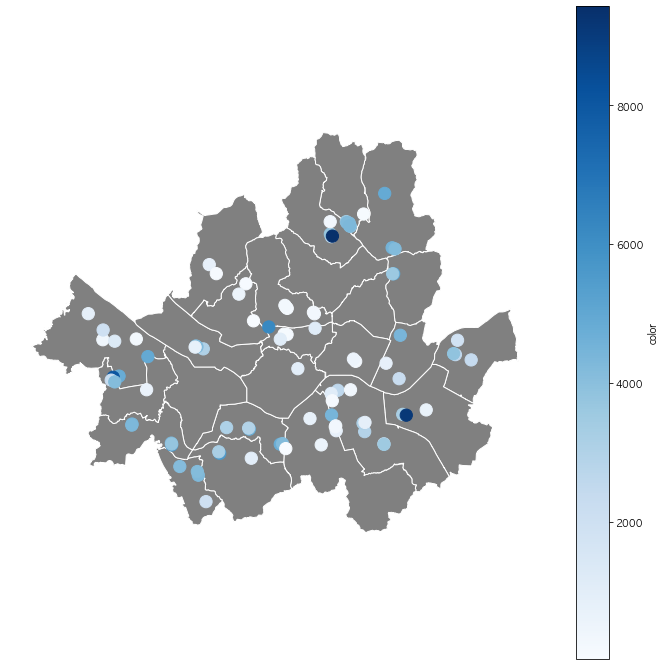

In [85]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(12,12))
seoul.plot(color='gray', edgecolor='white', ax = ax,)
tmp.plot.scatter(ax = ax, x="lon", y = "lat", c = "color", colormap = 'Blues',s = 150,
               alpha = 1)
ax.set_axis_off();
plt.show()

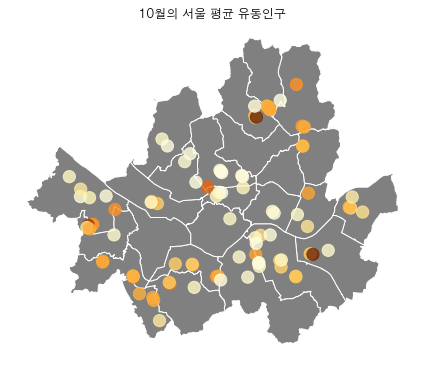

In [137]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,6))
seoul.plot(color='gray', edgecolor='white', ax = ax)
plot = ax.scatter(data = censor_gpd, x="lon", y = "lat", c = "fp", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax.set_axis_off()
ax.set_title( '10월의 서울 평균 유동인구')
plt.tight_layout()
plt.show()

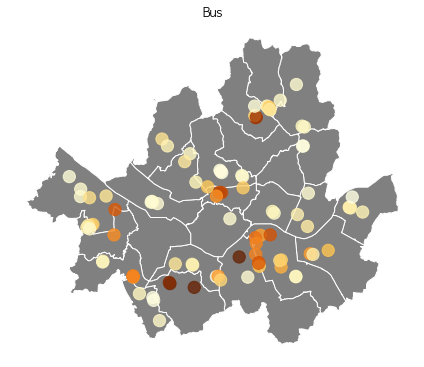

In [139]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,6))
seoul.plot(color='gray', edgecolor='white', ax = ax)
plot = ax.scatter(data = censor_gpd, x="lon", y = "lat", c = "bus", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax.set_axis_off()
ax.set_title( 'Bus')
plt.tight_layout()
plt.show()

In [135]:
censor_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   serial      93 non-null     float64 
 1   fp          93 non-null     float64 
 2   lat         93 non-null     float64 
 3   lon         93 non-null     float64 
 4   subway      93 non-null     float64 
 5   bus         93 non-null     float64 
 6   building_c  93 non-null     float64 
 7   building_a  93 non-null     float64 
 8   pop         93 non-null     float64 
 9   geometry    93 non-null     geometry
dtypes: float64(9), geometry(1)
memory usage: 8.0 KB


In [164]:
min(sensor.date), max(sensor.date)

('2021-01-04', '2021-10-23')

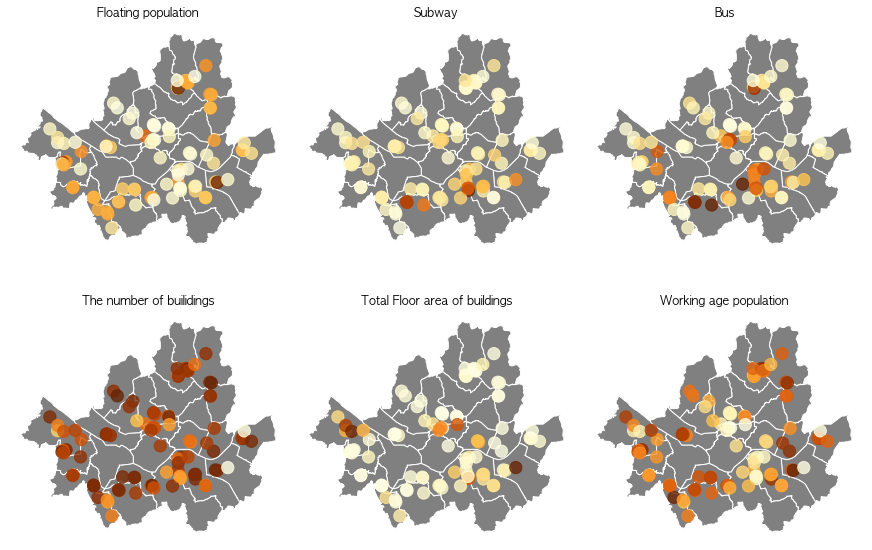

In [159]:
fig,ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,8), constrained_layout=True)
seoul.plot(color='gray', edgecolor='white', ax = ax[0,0])
plot = ax[0,0].scatter(data = censor_gpd, x="lon", y = "lat", c = "fp", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[0,0].set_axis_off()
ax[0,0].set_title( 'Floating population')
# plt.tight_layout()

# fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,12))
seoul.plot(color='gray', edgecolor='white', ax = ax[0,1])
plot = ax[0,1].scatter(data = censor_gpd, x="lon", y = "lat", c = "subway", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[0,1].set_axis_off()
ax[0,1].set_title( 'Subway')
# plt.tight_layout()


seoul.plot(color='gray', edgecolor='white', ax = ax[0,2])
plot = ax[0,2].scatter(data = censor_gpd, x="lon", y = "lat", c = "bus", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[0,2].set_axis_off()
ax[0,2].set_title('Bus')
# plt.tight_layout()

seoul.plot(color='gray', edgecolor='white', ax = ax[1,0])
plot = ax[1,0].scatter(data = censor_gpd, x="lon", y = "lat", c = "building_c", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[1,0].set_axis_off()
ax[1,0].set_title( 'The number of builidings')
# plt.tight_layout()


seoul.plot(color='gray', edgecolor='white', ax = ax[1,1])
plot = ax[1,1].scatter(data = censor_gpd, x="lon", y = "lat", c = "building_a", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[1,1].set_axis_off()
ax[1,1].set_title( 'Total Floor area of buildings')
# plt.tight_layout()


seoul.plot(color='gray', edgecolor='white', ax = ax[1,2])
plot = ax[1,2].scatter(data = censor_gpd, x="lon", y = "lat", c = "pop", cmap = 'YlOrBr',s = 150,
               alpha = 0.8)
cb = plt.colorbar(plot)
cb.remove()
ax[1,2].set_axis_off()
ax[1,2].set_title( 'Working age population')
# fig.tight_layout()
plt.show()
fig.savefig("/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/image/EDAplot.pdf")

In [17]:
tmp.head()

,lat,lon,color
0,37.4895,126.8848,"4,300.2149"
1,37.6374,127.0390,"3,851.4956"
2,37.4882,126.8851,"5,552.8974"
3,37.5025,126.8510,"4,434.7018"
4,37.5017,126.8508,"4,301.0746"


In [18]:
tmp.sort_values('lat')

,lat,lon,color
34,37.4495,126.9147,"2,011.9851"
32,37.4676,126.9081,"4,268.3860"
35,37.4701,126.9072,"4,166.5237"
33,37.4735,126.8921,"4,127.1500"
65,37.4792,126.9537,964.3792
39,37.4825,126.9265,"5,598.2096"
40,37.4836,126.9257,"3,203.7447"
72,37.4857,126.9834,31.3599
2,37.4882,126.8851,"5,552.8974"
73,37.4883,127.0139,555.5491


In [61]:
sensor_oct_hi

,serial,fp,lat,lon,subway,bus,building_c,building_a,pop,geometry
0,"2,992.0000","4,300.2149",37.4895,126.8848,"13,405.8421","1,289.4632",22.0000,"11,335.4700","4,508.0000","POLYGON ((37.989 126.885, 37.987 126.836, 37.9..."
1,"2,993.0000","3,851.4956",37.6374,127.0390,"7,283.8750",586.5902,21.0000,"6,650.0300","4,896.0000","POLYGON ((38.137 127.039, 38.135 126.990, 38.1..."
2,"2,994.0000","5,552.8974",37.4882,126.8851,"13,405.8421","1,114.5263",21.0000,"5,084.7400","5,513.0000","POLYGON ((37.988 126.885, 37.986 126.836, 37.9..."
3,"2,995.0000","4,434.7018",37.5025,126.8510,"2,546.0987",373.6684,19.0000,"5,717.5500","3,451.0000","POLYGON ((38.002 126.851, 38.000 126.802, 37.9..."
4,"2,996.0000","4,301.0746",37.5017,126.8508,"5,092.1974",277.2538,20.0000,"7,423.8000","4,199.0000","POLYGON ((38.002 126.851, 37.999 126.802, 37.9..."
5,"2,997.0000","4,705.9482",37.5344,126.8380,"12,248.7237",882.3421,20.0000,"17,808.0200","6,790.0000","POLYGON ((38.034 126.838, 38.032 126.789, 38.0..."
6,"2,998.0000","4,828.1167",37.5352,126.8399,"12,248.7237",721.0632,22.0000,"11,136.1700","7,312.0000","POLYGON ((38.035 126.840, 38.033 126.791, 38.0..."
7,"2,999.0000","2,922.8061",37.4973,127.0513,"12,598.0526",963.6541,22.0000,"105,169.6600","7,053.0000","POLYGON ((37.997 127.051, 37.995 127.002, 37.9..."
8,"3,000.0000","4,434.0728",37.5087,127.0228,"21,518.3947","1,275.2566",20.0000,"25,008.2700","3,531.0000","POLYGON ((38.009 127.023, 38.006 126.974, 37.9..."
9,"3,001.0000","2,632.8930",37.4890,127.0679,"3,371.1053",265.3450,14.0000,"95,036.8800","2,638.0000","POLYGON ((37.989 127.068, 37.987 127.019, 37.9..."


In [39]:
center = [37.541, 126.986]
m1 = folium.Map(location = center, tiles = 'openstreetmap', zoom_start = 10)

for i in range(0, len(sensor_oct_hi)):
    folium.Choropleth(
        geo_data = sensor_oct_hi["geometry"][i],
        fill_color = 'SkyBlue'
    ).add_to(m1)
m1

In [140]:
from branca.colormap import linear

In [19]:
m = folium.Map(
    location=[37.54238169591348,126.99068745821812],
 attr = '서울',
    zoom_start=12,
)
  
# for i in range(0, len(censor_gpd)):
#     folium.Choropleth(
#         geo_data = censor_gpd["geometry"][i],
#         fill_color = 'SkyBlue'
#     ).add_to(m)
    
folium.Choropleth(
    geo_data = censor_gpd,
    fill_color = 'YlGn',
    name="choropleth",
#     key_on = 'feature.id'
    highlight = True,
    line_opacity = 0.5,
    data = censor_gpd[['serial','fp']],
    columns = ['serial','fp'],
    fill_opacity = 0.7
    ).add_to(m)
    
# for lat, lng, label in zip(location.위도,location.경도,location.자치구):
#     folium.Marker(
#       location = [lat, lng], 
#       popup = label,
# #       icon = folium.Icon(color='red', icon='info-sign')
#      ).add_to(m) 

#                         ).add_to(m)
# folium.Popup(border.SGG_NM).add_to(m)    
folium.LayerControl().add_to(m)
folium.plugins.Fullscreen(position='topright',  
                   title='FULL SCREEN ON', 
                   title_cancel='FULL SCREEN OFF',
                   force_separate_button=True
                  ).add_to(m)

m

In [122]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

In [124]:
state_data.head()

,State,Unemployment
0,AL,7.1000
1,AK,6.8000
2,AZ,8.1000
3,AR,7.2000
4,CA,10.1000


In [131]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m
